In [ ]:
!pip install tweepy googletrans==4.0.0-rc1 textblob

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=34187ddbe3e7a4fd4dc8859a7b8c6193060ce8495b8ba655364c2f7e5cc76960
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [ ]:
import tweepy
from googletrans import Translator
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
bearer_token = "Your bearer Token"

client = tweepy.Client(bearer_token=bearer_token)

In [ ]:
import time

tweets = client.search_recent_tweets(
    query=query,
    tweet_fields=["lang"],
    max_results=jumlah_tweet
)

time.sleep(3)


In [ ]:
query = "jokowi"
jumlah_tweet = 10

tweets = client.search_recent_tweets(
    query=query,
    tweet_fields=["lang"],
    max_results=jumlah_tweet
)

In [ ]:
translator = Translator()
data = []

if tweets.data is not None and len(tweets.data) > 0:
    for tweet in tweets.data:
        if tweet.lang == "in":
            original_text = tweet.text
            try:
                translated = translator.translate(original_text, src='id', dest='en').text
                analysis = TextBlob(translated)
                sentiment = analysis.sentiment.polarity

                if sentiment > 0.1:
                    label = "Positif"
                elif sentiment < -0.1:
                    label = "Negatif"
                else:
                    label = "Netral"

                data.append([original_text, translated, sentiment, label])
            except Exception as e:
                print(f"Gagal terjemahkan tweet: {original_text[:50]}...")

    if data:
        df = pd.DataFrame(data, columns=["Tweet (ID)", "Terjemahan", "Skor Sentimen", "Label"])
        display(df)
    else:
        print("Tidak ada, Bahasa indonesia.")
else:
    print("Gada Tweet.")


,Tweet (ID),Terjemahan,Skor Sentimen,Label
0,Skripsi Jokowi 1985 ternyata dibuat tahun 2018...,"Jokowi's 1985 thesis was made in 2018, using t...",0.136364,Positif
1,RT @abu_waras: Gempar! Netizen Malaysia ini Se...,RT @ABU_WARAS: Gempar!This Malaysian netizen c...,-0.800000,Negatif
2,@mu133tmr @Epricila10 Teman sejawatnya pk Joko...,@Mu133TMR @EPRICILA10 PK Jokowi's colleague ha...,0.600000,Positif
3,Usulan Solo Jadi Daerah Istimewa Diduga demi K...,Solo's proposal became a special area allegedl...,0.085714,Netral
4,@NenkMonica Percuma ngomong sama buzzer Jokowi...,@Nennkmonica is useless to talk to Jokowi's bu...,-0.500000,Negatif
5,"RT @Zay34562: ""G30S Jokowi telah diterima peng...","RT @Zay34562: ""G30S Jokowi has been received b...",0.000000,Netral
6,RT @Srik4ndiMuslim2: Jokowi mendunia lagi. \n\...,RT @srik4ndimuslim2: Jokowi worldwide again.\n...,-0.500000,Negatif
7,"RT @Zay34562: ""G30S Jokowi telah diterima peng...","RT @Zay34562: ""G30S Jokowi has been received b...",0.000000,Netral
8,RT @Malaysia_Problm: Jokowi tengah baca Al-Fat...,RT @malaysia_problm: Jokowi is reading Al-Fati...,-0.600000,Negatif
9,RT @democrazymedia: Mengejutkan! Terungkap Dat...,RT @democrazymedia: Surprisingly!Jokowi's data...,0.206667,Positif


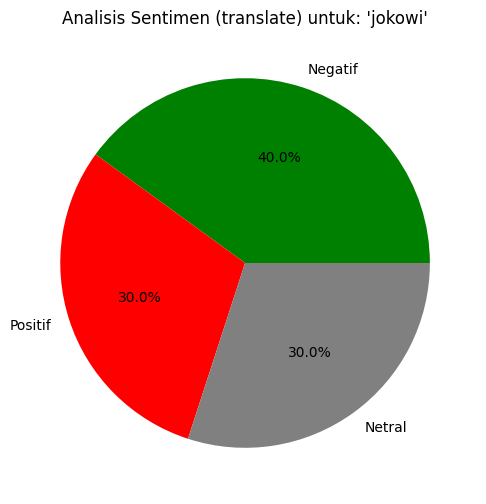

In [ ]:
if data:
    label_counts = df['Label'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['green','red','gray'])
    plt.title(f"Analisis Sentimen (translate) untuk: '{query}'")
    plt.show()


In [ ]:
!pip install seaborn

import seaborn as sns

<ipython-input-13-1fcb43de7d79>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Label", palette={"Positif": "green", "Negatif": "red", "Netral": "gray"})


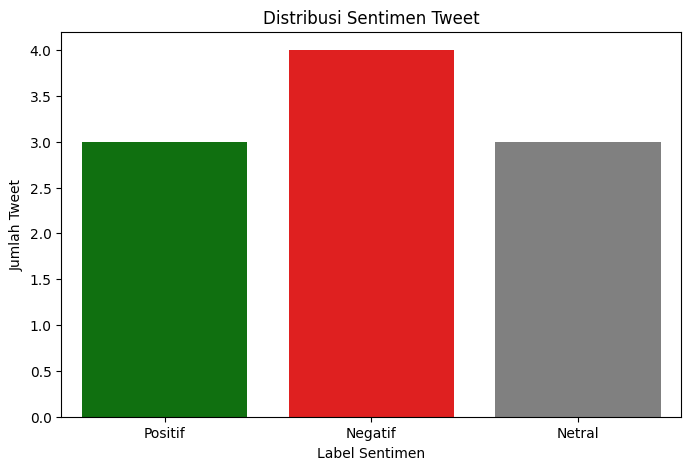

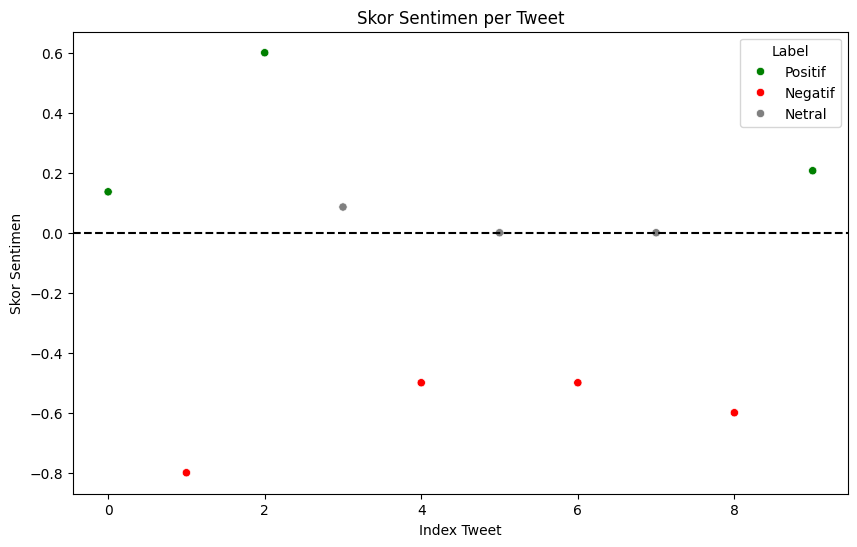

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Label", palette={"Positif": "green", "Negatif": "red", "Netral": "gray"})
plt.title("Distribusi Sentimen Tweet")
plt.xlabel("Label Sentimen")
plt.ylabel("Jumlah Tweet")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=range(len(df)), y="Skor Sentimen", hue="Label", palette={"Positif": "green", "Negatif": "red", "Netral": "gray"})
plt.title("Skor Sentimen per Tweet")
plt.xlabel("Index Tweet")
plt.ylabel("Skor Sentimen")
plt.axhline(0, color='black', linestyle='--')
plt.show()


In [ ]:
# Simpan ke file Excel
nama_file = "analisis_sentimen_twitter.xlsx"
df.to_excel(nama_file, index=False)

print(f"Data berhasil disimpan sebagai file Excel: {nama_file}")


Data berhasil disimpan sebagai file Excel: analisis_sentimen_twitter.xlsx


In [ ]:
from google.colab import files
files.download(nama_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>